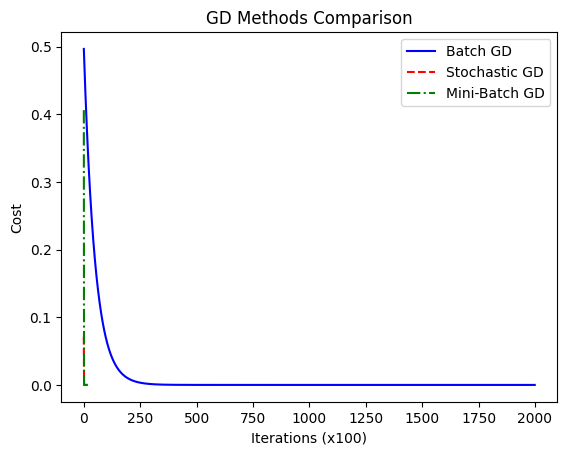

(<matplotlib.legend.Legend at 0x7ed5a0dac410>, None)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
X = pd.read_csv("linearX.csv").values
y = pd.read_csv("linearY.csv").values
X, y = X.reshape(-1, 1), y.reshape(-1, 1)

# Normalize X
X_mean, X_std = np.mean(X), np.std(X)
X = (X - X_mean) / X_std

# Gradient Descent Functions
def batch_gradient_descent(X, y, lr, num_iter):
    m, theta_0, theta_1, cost_hist = len(y), 0, 0, []
    for _ in range(num_iter):
        predictions = theta_0 + theta_1 * X
        errors = predictions - y
        theta_0 -= lr * np.mean(errors)
        theta_1 -= lr * np.mean(errors * X)
        cost_hist.append(np.mean(errors**2) / 2)  # Cost function
    return theta_0, theta_1, cost_hist

def stochastic_gradient_descent(X, y, lr, num_iter):
    m, theta_0, theta_1, cost_hist = len(y), 0, 0, []
    for iter in range(num_iter):
        for i in range(m):
            idx = np.random.randint(m)
            X_i, y_i = X[idx], y[idx]
            error = (theta_0 + theta_1 * X_i) - y_i
            theta_0 -= lr * error
            theta_1 -= lr * error * X_i
        if iter % 100 == 0:
            cost_hist.append(np.mean((theta_0 + theta_1 * X - y)**2) / 2)
    return theta_0, theta_1, cost_hist

def mini_batch_gradient_descent(X, y, lr, num_iter, batch_size=10):
    m, theta_0, theta_1, cost_hist = len(y), 0, 0, []
    for iter in range(num_iter):
        indices = np.random.permutation(m)
        X_shuffled, y_shuffled = X[indices], y[indices]
        for i in range(0, m, batch_size):
            X_batch, y_batch = X_shuffled[i:i+batch_size], y_shuffled[i:i+batch_size]
            error = (theta_0 + theta_1 * X_batch) - y_batch
            theta_0 -= lr * np.mean(error)
            theta_1 -= lr * np.mean(error * X_batch)
        if iter % 100 == 0:
            cost_hist.append(np.mean((theta_0 + theta_1 * X - y)**2) / 2)
    return theta_0, theta_1, cost_hist

# Train models with learning rate = 0.01
lr, num_iter = 0.01, 2000
_, _, cost_bgd = batch_gradient_descent(X, y, lr, num_iter)
_, _, cost_sgd = stochastic_gradient_descent(X, y, lr, num_iter)
_, _, cost_mbgd = mini_batch_gradient_descent(X, y, lr, num_iter)

# Plot Cost Function vs Iteration
plt.plot(cost_bgd, label="Batch GD", linestyle="-", color="blue")
plt.plot(cost_sgd, label="Stochastic GD", linestyle="--", color="red")
plt.plot(cost_mbgd, label="Mini-Batch GD", linestyle="-.", color="green")
plt.xlabel("Iterations (x100)"), plt.ylabel("Cost"), plt.title("GD Methods Comparison")
plt.legend(), plt.show()
